<a href="https://colab.research.google.com/github/lizathulya/Python/blob/main/Automating_Crypto_Website_API_Pull_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the status and makes it all pretty in a dataframe

pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2025-01-13T00:01:43.767Z,0,None,28,1,None,10592


In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df=pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980938e+07,1.980938e+07,False,NaN,1,None,None,None,2025-01-12T23:59:00.000Z,94488.892174,2.088513e+10,10.7325,0.691120,-0.081249,-3.912244,-6.847488,4.410452,43.026118,1.871766e+12,56.7278,1.984267e+12,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204907e+08,1.204907e+08,True,NaN,2,None,None,None,2025-01-13T00:00:00.000Z,3265.575053,1.164876e+10,-1.0385,0.838009,-0.498349,-10.223285,-16.474293,2.350101,24.169900,3.934714e+11,11.9295,3.934714e+11,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.749312e+10,9.998667e+10,False,NaN,3,None,None,None,2025-01-12T23:59:00.000Z,2.506373,5.572029e+09,-30.0248,0.504815,-2.732691,4.442920,3.467682,263.079217,357.332666,1.440992e+11,4.3681,2.506373e+11,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
3,825,Tether USDt,USDT,tether,112268,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374514e+11,1.414371e+11,True,NaN,4,None,None,None,2025-01-12T23:59:00.000Z,0.999541,5.463703e+10,-5.0374,-0.005322,-0.007603,-0.036127,-0.063501,-0.165963,-0.008611,1.373883e+11,4.1646,1.413722e+11,None,2025-01-12T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 00:25:10.198684
4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440062e+08,1.440062e+08,False,NaN,5,None,None,None,2025-01-12T23:59:00.000Z,693.048115,1.291862e+09,0.1387,0.337248,-0.518153,-2.289701,-4.564865,11.623959,17.682072,9.980322e+10,3.0253,9.980322e+10,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.842014e+08,5.919914e+08,True,NaN,6,None,None,None,2025-01-13T00:00:00.000Z,188.519215,1.544467e+09,-28.9524,0.946410,0.277720,-11.709584,-16.119178,-12.472156,19.663641,9.128126e+10,2.7675,1.116018e+11,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475987e+11,1.475987e+11,True,NaN,7,None,None,None,2025-01-12T23:59:00.000Z,0.335956,1.436724e+09,-1.6620,0.829740,-1.464671,-12.174623,-17.879911,-15.865191,187.986929,4.958666e+10,1.5031,4.958666e+10,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684
7,3408,USDC,USDC,usd-coin,24653,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.574902e+10,4.574902e+10,False,NaN,8,None,None,None,2025-01-12T23:59:00.000Z,0.999970,3.330316e+09,-11.4294,-0.007423,0.000252,-0.013321,0.003697,-0.001322,0.011379,4.574763e+10,1.3867,4.574763e+10,None,2025-01-12T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-13 00:25:10.198684
8,2010,Cardano,ADA,cardano,1433,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE: had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 " into the Anaconda Prompt to change this to allow to pull data

    # Use this to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [9]:
import os
from time import time
from time import sleep

for i in range(10000):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19809381.00000,19809381.00000,False,NaN,1,None,None,None,2025-01-12T23:59:00.000Z,94488.89217,20885130964.78889,10.73250,0.69112,-0.08125,-3.91224,-6.84749,4.41045,43.02612,1871766465336.37231,56.72780,1984266735647.31006,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120490689.42870,120490689.42870,True,NaN,2,None,None,None,2025-01-13T00:00:00.000Z,3265.57505,11648755679.05618,-1.03850,0.83801,-0.49835,-10.22329,-16.47429,2.35010,24.16990,393471389535.42279,11.92950,393471389535.41998,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57493120449.00000,99986673391.00000,False,NaN,3,None,None,None,2025-01-12T23:59:00.000Z,2.50637,5572029190.21649,-30.02480,0.50481,-2.73269,4.44292,3.46768,263.07922,357.33267,144099223181.93631,4.36810,250637332008.73001,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
3,825,Tether USDt,USDT,tether,112268,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137451354879.70145,141437091577.73459,True,NaN,4,None,None,None,2025-01-12T23:59:00.000Z,0.99954,54637025454.49000,-5.03740,-0.00532,-0.00760,-0.03613,-0.06350,-0.16596,-0.00861,137388313633.25081,4.16460,141372222296.85001,None,2025-01-12T23:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 00:25:10.198684,NaT
4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006187.85000,144006187.85000,False,NaN,5,None,None,None,2025-01-12T23:59:00.000Z,693.04811,1291862068.94117,0.13870,0.33725,-0.51815,-2.28970,-4.56487,11.62396,17.68207,99803217006.03778,3.02530,99803217006.03999,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,484201376.43676,591991438.37036,True,NaN,6,None,None,None,2025-01-13T00:00:00.000Z,188.51921,1544467431.01947,-28.95240,0.94641,0.27772,-11.70958,-16.11918,-12.47216,19.66364,91281263199.42532,2.76750,111601761018.02000,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147598746383.70520,147598746383.70520,True,NaN,7,None,None,None,2025-01-12T23:59:00.000Z,0.33596,1436724129.36153,-1.66200,0.82974,-1.46467,-12.17462,-17.87991,-15.86519,187.98693,49586661354.66756,1.50310,49586661354.67000,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
7,3408,USDC,USDC,usd-coin,24653,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45749017022.68953,45749017022.68953,False,NaN,8,None,None,None,2025-01-12T23:59:00.000Z,0.99997,3330316048.95117,-11.42940,-0.00742,0.00025,-0.01332,0.00370,-0.00132,0.01138,45747627405.03196,1.38670,45747627405.03000,None,2025-01-12T23:59:

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19809381.00000,19809381.00000,False,NaN,1,None,None,None,2025-01-12T23:59:00.000Z,94488.89217,20885130964.78889,10.73250,0.69112,-0.08125,-3.91224,-6.84749,4.41045,43.02612,1871766465336.37231,56.72780,1984266735647.31006,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120490689.42870,120490689.42870,True,NaN,2,None,None,None,2025-01-13T00:00:00.000Z,3265.57505,11648755679.05618,-1.03850,0.83801,-0.49835,-10.22329,-16.47429,2.35010,24.16990,393471389535.42279,11.92950,393471389535.41998,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57493120449.00000,99986673391.00000,False,NaN,3,None,None,None,2025-01-12T23:59:00.000Z,2.50637,5572029190.21649,-30.02480,0.50481,-2.73269,4.44292,3.46768,263.07922,357.33267,144099223181.93631,4.36810,250637332008.73001,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
3,825,Tether USDt,USDT,tether,112268,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137451354879.70145,141437091577.73459,True,NaN,4,None,None,None,2025-01-12T23:59:00.000Z,0.99954,54637025454.49000,-5.03740,-0.00532,-0.00760,-0.03613,-0.06350,-0.16596,-0.00861,137388313633.25081,4.16460,141372222296.85001,None,2025-01-12T23:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 00:25:10.198684,NaT
4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006187.85000,144006187.85000,False,NaN,5,None,None,None,2025-01-12T23:59:00.000Z,693.04811,1291862068.94117,0.13870,0.33725,-0.51815,-2.28970,-4.56487,11.62396,17.68207,99803217006.03778,3.02530,99803217006.03999,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,484201376.43676,591991438.37036,True,NaN,6,None,None,None,2025-01-13T00:00:00.000Z,188.51921,1544467431.01947,-28.95240,0.94641,0.27772,-11.70958,-16.11918,-12.47216,19.66364,91281263199.42532,2.76750,111601761018.02000,None,2025-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147598746383.70520,147598746383.70520,True,NaN,7,None,None,None,2025-01-12T23:59:00.000Z,0.33596,1436724129.36153,-1.66200,0.82974,-1.46467,-12.17462,-17.87991,-15.86519,187.98693,49586661354.66756,1.50310,49586661354.67000,None,2025-01-12T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 00:25:10.198684,NaT
7,3408,USDC,USDC,usd-coin,24653,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45749017022.68953,45749017022.68953,False,NaN,8,None,None,None,2025-01-12T23:59:00.000Z,0.99997,3330316048.95117,-11.42940,-0.00742,0.00025,-0.01332,0.00370,-0.00132,0.01138,45747627405.03196,1.38670,45747627405.03000,None,2025-01-12T23:59:

In [32]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.56786,0.07148,-4.01224,-6.78740,4.70503,42.96312
Ethereum,1.01722,-0.13377,-10.11541,-16.39903,2.58563,24.48592
XRP,1.11630,-1.05338,4.72126,3.96846,263.73451,359.40975
Tether USDt,-0.01092,-0.02153,-0.03866,-0.06566,-0.17547,-0.01900
BNB,0.44913,-0.35739,-2.21486,-4.73999,11.98869,17.59680
Solana,1.06119,0.58306,-11.61615,-16.05014,-12.17444,19.81681
Dogecoin,0.86336,-0.93308,-11.91918,-17.66806,-15.31164,186.26238
USDC,-0.00178,-0.00324,-0.01076,0.00623,-0.00201,0.01737
Cardano,0.55636,-2.16923,-10.71480,-13.58059,67.44495,165.84012


In [33]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.56786
             quote.USD.percent_change_24h     0.07148
             quote.USD.percent_change_7d     -4.01224
             quote.USD.percent_change_30d    -6.78740
             quote.USD.percent_change_60d     4.70503
             quote.USD.percent_change_90d    42.96312
Ethereum     quote.USD.percent_change_1h      1.01722
             quote.USD.percent_change_24h    -0.13377
             quote.USD.percent_change_7d    -10.11541
             quote.USD.percent_change_30d   -16.39903
             quote.USD.percent_change_60d     2.58563
             quote.USD.percent_change_90d    24.48592
XRP          quote.USD.percent_change_1h      1.11630
             quote.USD.percent_change_24h    -1.05338
             quote.USD.percent_change_7d      4.72126
             quote.USD.percent_change_30d     3.96846
             quote.USD.percent_change_60d   263.73451
             quote.USD.percent_change_90d   359.40975
Tether USDt  quote.USD.percent_change_1h     -0.01092
             quote.USD.percent_change_24h    -0.02153
             quote.USD.percent_change_7d     -0.03866
             quote.USD.percent_change_30d    -0.06566
             quote.USD.percent_change_60d    -0.17547
             quote.USD.percent_change_90d    -0.01900
BNB          quote.USD.percent_change_1h      0.44913
             quote.USD.percent_change_24h    -0.35739
             quote.USD.percent_change_7d     -2.21486
             quote.USD.percent_change_30d    -4.73999
             quote.USD.percent_change_60d    11.98869
             quote.USD.percent_change_90d    17.59680
Solana       quote.USD.percent_change_1h      1.06119
             quote.USD.percent_change_24h     0.58306
             quote.USD.percent_change_7d    -11.61615
             quote.USD.percent_change_30d   -16.05014
             quote.USD.percent_change_60d   -12.17444
             quote.USD.percent_change_90d    19.81681
Dogecoin     quote.USD.percent_change_1h      0.86336
             quote.USD.percent_change_24h    -0.93308
             quote.USD.percent_change_7d    -11.91918
             quote.USD.percent_change_30d   -17.66806
             quote.USD.percent_change_60d   -15.31164
             quote.USD.percent_change_90d   186.26238
USDC         quote.USD.percent_change_1h     -0.00178
             quote.USD.percent_change_24h    -0.00324
             quote.USD.percent_change_7d     -0.01076
             quote.USD.percent_change_30d     0.00623
             quote.USD.percent_change_60d    -0.00201
             quote.USD.percent_change_90d     0.01737
Cardano      quote.USD.percent_change_1h      0.55636
             quote.USD.percent_change_24h    -2.16923
             quote.USD.percent_change_7d    -10.71480
             quote.USD.percent_change_30d   -13.58059
             quote.USD.percent_change_60d    67.44495
             quote.USD.percent_change_90d   165.84012
TRON         quote.USD.percent_change_1h      0.72168
             quote.USD.percent_change_24h    -3.05710
             quote.USD.percent_change_7d    -11.02759
             quote.USD.percent_change_30d   -19.88287
             quote.USD.percent_change_60d    30.78631
             quote.USD.percent_change_90d    45.44053
Avalanche    quote.USD.percent_change_1h      0.79509
             quote.USD.percent_change_24h    -1.19057
             quote.USD.percent_change_7d    -14.99342
             quote.USD.percent_change_30d   -31.17856
             quote.USD.percent_change_60d    10.59045
             quote.USD.percent_change_90d    25.84637
Sui          quote.USD.percent_change_1h      0.76247
             quote.USD.percent_change_24h    -4.27305
             quote.USD.percent_change_7d     -9.09163
             quote.USD.percent_change_30d    -0.00912
             quote.USD.percent_change_60d    41.94425
             quote.USD.percent_change_90d   112.50076
Toncoin      quote.USD.percent_change_1h      0.35518
             quo

In [34]:
type(df4)

pandas.core.series.Series

In [35]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.56786
            quote.USD.percent_change_24h   0.07148
            quote.USD.percent_change_7d   -4.01224
            quote.USD.percent_change_30d  -6.78740
            quote.USD.percent_change_60d   4.70503
            quote.USD.percent_change_90d  42.96312
Ethereum    quote.USD.percent_change_1h    1.01722
            quote.USD.percent_change_24h  -0.13377
            quote.USD.percent_change_7d  -10.11541
            quote.USD.percent_change_30d -16.39903
            quote.USD.percent_change_60d   2.58563
            quote.USD.percent_change_90d  24.48592
XRP         quote.USD.percent_change_1h    1.11630
            quote.USD.percent_change_24h  -1.05338
            quote.USD.percent_change_7d    4.72126
            quote.USD.percent_change_30d   3.96846
            quote.USD.percent_change_60d 263.73451
            quote.USD.percent_change_90d 359.40975
Tether USDt quote.USD.percent_change_1h   -0.01092
            quote.USD.percent_change_24h  -0.02153
            quote.USD.percent_change_7d   -0.03866
            quote.USD.percent_change_30d  -0.06566
            quote.USD.percent_change_60d  -0.17547
            quote.USD.percent_change_90d  -0.01900
BNB         quote.USD.percent_change_1h    0.44913
            quote.USD.percent_change_24h  -0.35739
            quote.USD.percent_change_7d   -2.21486
            quote.USD.percent_change_30d  -4.73999
            quote.USD.percent_change_60d  11.98869
            quote.USD.percent_change_90d  17.59680
Solana      quote.USD.percent_change_1h    1.06119
            quote.USD.percent_change_24h   0.58306
            quote.USD.percent_change_7d  -11.61615
            quote.USD.percent_change_30d -16.05014
            quote.USD.percent_change_60d -12.17444
            quote.USD.percent_change_90d  19.81681
Dogecoin    quote.USD.percent_change_1h    0.86336
            quote.USD.percent_change_24h  -0.93308
            quote.USD.percent_change_7d  -11.91918
            quote.USD.percent_change_30d -17.66806
            quote.USD.percent_change_60d -15.31164
            quote.USD.percent_change_90d 186.26238
USDC        quote.USD.percent_change_1h   -0.00178
            quote.USD.percent_change_24h  -0.00324
            quote.USD.percent_change_7d   -0.01076
            quote.USD.percent_change_30d   0.00623
            quote.USD.percent_change_60d  -0.00201
            quote.USD.percent_change_90d   0.01737
Cardano     quote.USD.percent_change_1h    0.55636
            quote.USD.percent_change_24h  -2.16923
            quote.USD.percent_change_7d  -10.71480
            quote.USD.percent_change_30d -13.58059
            quote.USD.percent_change_60d  67.44495
            quote.USD.percent_change_90d 165.84012
TRON        quote.USD.percent_change_1h    0.72168
            quote.USD.percent_change_24h  -3.05710
            quote.USD.percent_change_7d  -11.02759
            quote.USD.percent_change_30d -19.88287
            quote.USD.percent_change_60d  30.78631
            quote.USD.percent_change_90d  45.44053
Avalanche   quote.USD.percent_change_1h    0.79509
            quote.USD.percent_change_24h  -1.19057
            quote.USD.percent_change_7d  -14.99342
            quote.USD.percent_change_30d -31.17856
            quote.USD.percent_change_60d  10.59045
            quote.USD.percent_change_90d  25.84637
Sui         quote.USD.percent_change_1h    0.76247
            quote.USD.percent_change_24h  -4.27305
            quote.USD.percent_change_7d   -9.09163
            quote.USD.percent_change_30d  -0.00912
            quote.USD.percent_change_60d  41.94425
            quote.USD.percent_change_90d 112.50076
Toncoin     quote.USD.percent_change_1h    0.35518
            quote.USD.percent_change_24h  -1.68896
            quote.USD.percent_change_7d   -7.35480
            quote.USD.percent_change_30d -16.61741
            quote.USD.percent_change_60d   0.71659
            quo

In [36]:
df5.count()

,0
values,90


In [37]:
#Since the structure of the dataframe requires an index, but I don't want to use any existing column as the index, I'll create a range and assign that as the index for the dataframe.


index = pd.Index(range(90))

# # since it only has the index and values we are  doing reset_index like "df5.reset_index()"
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.56786
1,Bitcoin,quote.USD.percent_change_24h,0.07148
2,Bitcoin,quote.USD.percent_change_7d,-4.01224
3,Bitcoin,quote.USD.percent_change_30d,-6.78740
4,Bitcoin,quote.USD.percent_change_60d,4.70503
5,Bitcoin,quote.USD.percent_change_90d,42.96312
6,Ethereum,quote.USD.percent_change_1h,1.01722
7,Ethereum,quote.USD.percent_change_24h,-0.13377
8,Ethereum,quote.USD.percent_change_7d,-10.11541
9,Ethereum,quote.USD.percent_change_30d,-16.39903


In [38]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.56786
1,Bitcoin,quote.USD.percent_change_24h,0.07148
2,Bitcoin,quote.USD.percent_change_7d,-4.01224
3,Bitcoin,quote.USD.percent_change_30d,-6.78740
4,Bitcoin,quote.USD.percent_change_60d,4.70503
5,Bitcoin,quote.USD.percent_change_90d,42.96312
6,Ethereum,quote.USD.percent_change_1h,1.01722
7,Ethereum,quote.USD.percent_change_24h,-0.13377
8,Ethereum,quote.USD.percent_change_7d,-10.11541
9,Ethereum,quote.USD.percent_change_30d,-16.39903


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#we can modify the name of the columns for better viewing
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.56786
1,Bitcoin,24h,0.07148
2,Bitcoin,7d,-4.01224
3,Bitcoin,30d,-6.78740
4,Bitcoin,60d,4.70503
5,Bitcoin,90d,42.96312
6,Ethereum,quote.USD.percent_change_1h,1.01722
7,Ethereum,24h,-0.13377
8,Ethereum,7d,-10.11541
9,Ethereum,30d,-16.39903


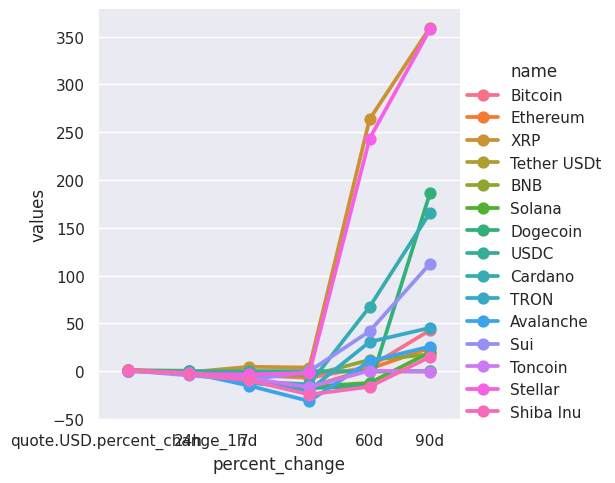

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'XRP'")
df10


,name,quote.USD.price,timestamp
2,XRP,2.50637,2025-01-13 00:25:10.198684
17,XRP,2.52408,NaT
32,XRP,2.52483,NaT
